In [28]:
!pip install plotly

!pip install plotly dash pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 46.4 MB/s eta 0:00:00


In [1]:
# Twitter Stock Market Analysis
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio

pio.templates.default = "plotly_white"

In [2]:
#1. Read the data and display the first 100 rows from the table.

data = pd.read_excel("/content/TWTR.xlsx")
data.head(100)

Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   
..        ...        ...        ...        ...        ...        ...   
95 2014-03-27  45.090000  46.400002  43.310001  46.320000  46.320000   
96 2014-03-28  46.650002  47.340000  45.700001  47.299999  47.299999   
97 2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   
98 2014-04-01  46.709999  47.590000  46.180000  46.980000  46.980000   
99 2014-04-02  47.400002  47.439999  45.509998  45.730000  45.730000   

         Volume  
0   117701670.0  
1    27925307.0  
2    16113941.0  
3     6316755.0  
4     8688325.0  
..          ...  
95   15507597.0  
96    9610491.0  
97    5794497.0  
98    6916147.0  
99    7911260.0  

[100 rows x 7 columns]

In [3]:
#2)	Give the column insights.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2264 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [4]:
#3)	Check whether this dataset contains any null values or not if it is there then remove the null values from it

data.isnull().sum()



Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [5]:
data = data.dropna()


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#4)	Find the statistical description of the data.

data.describe()

Open         High          Low        Close    Adj Close  \
count  2259.000000  2259.000000  2259.000000  2259.000000  2259.000000   
mean     36.020286    36.699881    35.339465    36.003625    36.003625   
std      14.118463    14.372057    13.828724    14.089989    14.089989   
min      13.950000    14.220000    13.725000    14.010000    14.010000   
25%      25.550000    26.215001    24.912501    25.410000    25.410000   
50%      35.419998    36.099998    34.820000    35.490002    35.490002   
75%      44.205000    45.015000    43.327501    44.135000    44.135000   
max      78.360001    80.750000    76.050003    77.629997    77.629997   

             Volume  
count  2.259000e+03  
mean   2.175186e+07  
std    1.909988e+07  
min    0.000000e+00  
25%    1.233530e+07  
50%    1.691305e+07  
75%    2.428082e+07  
max    2.692131e+08

In [8]:
#5)	Find the missing values in the data

data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2254    False
2255    False
2256    False
2257    False
2258    False
Length: 2259, dtype: bool

In [10]:
data.duplicated().sum()

0

In [11]:
import statistics as st
from statsmodels.stats import weightstats as stests

# Assuming 'data' is your DataFrame containing the 'High' column
high = data['High'].dropna()

print("High data : ", high)

high_mean = st.mean(high)
print("Mean of the High Columns:" ,high_mean)

high_stdev = st.stdev(high)
print("Standard Deviation of the data :" , high_stdev)

ztest  , pval = stests.ztest(high , value = 30)
print("Z_test Score: ",ztest )
print("P-Value: ", pval)

if pval < 0.05:
  print("Reject Null Hypthesis")
else:
  print("Accept Null Hypothesis")

High data :  0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
Mean of the High Columns: 36.69988069278442
Standard Deviation of the data : 14.372056692309659
Z_test Score:  22.15676048174423
P-Value:  8.978177265940086e-109
Reject Null Hypthesis


In [12]:
# 6)	Give me the Z-test O/R T-test over High, low, and close columns and see if the null hypothesis gets rejected or accepted.

import statistics as st
from statsmodels.stats import weightstats as stests
from numpy import random

# Assuming 'data' is your DataFrame containing the 'High' column
high = data['High'].dropna()

print("High data : ", high)

high_mean = st.mean(high)
print("Mean of the High Columns:" , high_mean)

high_stdev = st.stdev(high)
print("Standard Deviation of the data :" , high_stdev)

ztest  , pval = stests.ztest(high , value = 30)
print("Z_test Score: ",ztest )
print("P-Value: ", pval)

if pval < 0.05:
  print("Reject Null Hypthesis")
else:
  print("Accept Null Hypothesis")

High data :  0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
Mean of the High Columns: 36.69988069278442
Standard Deviation of the data : 14.372056692309659
Z_test Score:  22.15676048174423
P-Value:  8.978177265940086e-109
Reject Null Hypthesis


In [13]:
# Assuming 'data' is your DataFrame containing the 'Low' column
low = data['Low'].dropna()

print("Low data : ", low)

low_mean = st.mean(low)
print("Mean of the Low Columns:" , low_mean)

low_stdev = st.stdev(low)
print("Standard Deviation of the data :" , low_stdev)

ztest  , pval = stests.ztest(low , value = 30)
print("Z_test Score: ",ztest )
print("P-Value: ", pval)

if pval < 0.05:
  print("Reject Null Hypthesis")
else:
  print("Accept Null Hypothesis")

Low data :  0       44.000000
1       40.685001
2       39.400002
3       41.830002
4       40.759998
          ...    
2254    49.549999
2255    50.520000
2256    52.200001
2257    52.770000
2258    53.700001
Name: Low, Length: 2259, dtype: float64
Mean of the Low Columns: 35.339464800354136
Standard Deviation of the data : 13.828723572649182
Z_test Score:  18.35159210972168
P-Value:  3.205795428365976e-75
Reject Null Hypthesis


In [14]:
close = data['Close'].dropna()
print("Close data : ", close)

close_mean = st.mean(close)
print("Mean of the Close Columns:" , close_mean)

close_stdev = st.stdev(close)
print("Standard Deviation of the data :" , close_stdev)

ztest  , pval = stests.ztest(close , value = 30)
print("Z_test Score: ",ztest )
print("P-Value: ", pval)

if pval < 0.05:
  print("Reject Null Hypthesis")
else:
  print("Accept Null Hypothesis")


Close data :  0       44.900002
1       41.650002
2       42.900002
3       41.900002
4       42.599998
          ...    
2254    49.889999
2255    51.520000
2256    52.779999
2257    53.349998
2258    53.700001
Name: Close, Length: 2259, dtype: float64
Mean of the Close Columns: 36.00362549048251
Standard Deviation of the data : 14.08998893401524
Z_test Score:  20.251679995652125
P-Value:  3.433291673809823e-91
Reject Null Hypthesis


In [17]:
# Perform one-sample t_test for high data

t_test, pval = ttest_1samp(high, 30)

print("T-test Score for High Data: ", t_test)
print("P-Value for High Data: ", pval)

if pval < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

########################################################

# Perform one-sample t_test for low data

t_test, pval = ttest_1samp(low, 30)

print("T-test Score for Low Data: ", t_test)
print("P-Value for Low Data: ", pval)

if pval < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

########################################################

# Perform one-sample t_test for close data

t_test, pval = ttest_1samp(close, 30)

print("T-test Score for Close Data: ", t_test)
print("P-Value for Close Data: ", pval)

if pval < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

T-test Score for High Data:  22.15676048174423
P-Value for High Data:  1.3745989635531811e-98
Reject Null Hypothesis
T-test Score for Low Data:  18.351592109721675
P-Value for Low Data:  3.1751565105922235e-70
Reject Null Hypothesis
T-test Score for Close Data:  20.251679995652125
P-Value for Close Data:  6.26844020254432e-84
Reject Null Hypothesis


In [16]:
from scipy.stats import ttest_1samp


In [18]:
# 7)	By using ANOVA find the Fvalue and Pvalue from the data and see its Acceptance and rejection of the Null hypothesis.

import scipy.stats as ssf

grp1 = data['High']
grp2 = data['Low']
grp1.head()
grp2.head()

F_value, p_val = ssf.f_oneway(grp1, grp2)
print("F-value from the data : ", F_value)
print("P-value from the data : ", p_val)

if p_val < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")


F-value from the data :  10.510084066032649
P-value from the data :  0.0011958722702637046
Reject the Null Hypothesis


In [19]:
# 8)	Check if the data is dependent or independent by using the chi-square method.

# Dependent -- Reject the null hypothesis
# Independent -- Accept the null hypothesis

datas = {"High" : data['High'],
         "Low" : data['Low']}

#print(datas)

chisq , pval = ssf.chisquare(datas['Low'])
alpha = 0.05

print("Chi-Square Values : ", chisq)
print("P-Values : ", pval)

if pval < alpha:
  print("Dependent Data")
else:
  print("Independent Data")


Chi-Square Values :  12218.788864355833
P-Values :  0.0
Dependent Data


In [20]:
# 10)	Write the insights which you have got from the above tests.

# Here are the insights generated from each test based on the analysis of Twitter stock market data.

# Z-test and T-test on High, Low, and Close columns:
# •	The Z-test and T-test were used on the High, Low, and Close columns to see if their means differed substantially from the mean of 30.
# •	The null hypothesis for each column was that the mean would be 30.
# •	A p-value of less than 0.05 rejected the null hypothesis, suggesting a significant difference in the mean. Otherwise, the null hypothesis was accepted.

# Insights:
# Interpret the findings for each column (High, Low, Close) according to whether the null hypothesis was rejected or accepted.

# ANOVA (Analysis of Variance):
# •	ANOVA was performed to determine significant differences between the High and Low columns.
# •	The null hypothesis stated that there is no significant difference in means.
# •	A p-value of less than 0.05 rejected the null hypothesis, suggesting a significant difference in means. Otherwise, the null hypothesis was accepted.

# Insights:
# Interpret the results of the ANOVA test.

# Chi-square test:
# •	The chi-square test was performed to identify if the High and Low columns are dependent or independent.
# •	The null hypothesis suggested that the columns are independent.
# •	If the p-value of the chi-square test was less than 0.05, the null hypothesis was rejected, suggesting column dependency. Otherwise, the null hypothesis was accepted.

# Insights:
# •	Interpret the chi-square test findings.
# •	These tests provide insights into the statistical features and correlations in Twitter stock market data, guiding subsequent analysis and decision-making processes.


In [21]:
# 11)	Show the Twitter stock prices over the years and give a conclusion.

figure = go.Figure(data = [go.Candlestick(
    x = data['Date'],
    open = data['Open'],
    high = data['High'],
    low = data['Low'],
    close = data['Close']

)])

figure.update_layout(
    title = "Twitter Stock Market Prices Over the Years",
    xaxis_rangeslider_visible = True

)

figure.show()

In [22]:
# 12)	Now compare the close vs date column for Twitter prices over the years.

figure = px.bar(data, x = "Date", y = "Close", color = "Close")

figure.update_layout(
    title = "Comparison Close vs Date Column for Twitter Prices Over the Years",
    xaxis_rangeslider_visible = True

)

# figure.update_xaxes(rangeslider_visible = True)

figure.show()

In [23]:
# 13)	Assign buttons to control time periods.  Add the  buttons to analyze the stock prices of Twitter in different time periods:

figure = px.bar(data, x = "Date", y = "Close", color = "Close")

figure.update_xaxes(rangeslider_visible = True)

figure.update_layout(

    title = "Twitter Stock Prices Over the Years"
)

figure.update_xaxes(

    rangeselector = dict(

        buttons = list([

                       dict(count = 1, label = '1m' , step = "month", stepmode = "backward"),
                       dict(count = 6, label = '6m' , step = "month", stepmode = "backward"),
                       dict(count = 3, label = '3m' , step = "month", stepmode = "backward"),
                       dict(count = 1, label = '1y' , step = "year", stepmode = "backward"),
                       dict(count = 2, label = '2y' , step = "year", stepmode = "backward"),
                       dict(step = "all"),
        ])
    )
)

figure.show()

In [24]:
# 14)	Give the complete timeline of Twitter in the stock market. (Line Graph)

data['Date'] = pd.to_datetime(data["Date"], format = '%Y-%m-%d')

data['Year'] = data['Date'].dt.year

data['Month'] = data['Date'].dt.month

fig = px.line(data ,


              x = "Month",
              y = "Close",
              color = 'Year',
              title = "Complete Timeline of Twitter"
              )

fig.show()

In [25]:
# 15)	Show the quartile, inter-quartile Lower, Median, and Upper Quartile on the given dataset  you can use any three columns for that (Box-Plot)

selected_columns = data[['High', 'Low', 'Close']]

# Creating box plots using Plotly

fig = px.box(selected_columns ,
              title = "Box Plot of High, Low, and Close Columns",
             labels={'variable': 'Column', 'value': 'Value'},
             boxmode='group'
              )

# Adding quartiles, median, and interquartile range (IQR) annotations
for trace in fig.data:
    q1 = trace.q1
    q3 = trace.q3
    median = trace.median

    # Adding annotations for quartiles, median, and IQR
    fig.add_annotation(x=trace.name, y=q1, text=f'Q1: {q1}', showarrow=False, yshift=10)
    fig.add_annotation(x=trace.name, y=median, text=f'Median: {median}', showarrow=False, yshift=10)
    fig.add_annotation(x=trace.name, y=q3, text=f'Q3: {q3}', showarrow=False, yshift=10)
    fig.add_shape(type="line", x0=trace.name, y0=q1, x1=trace.name, y1=q3, line=dict(color="blue", width=1))

    # Calculate and add annotations for minimum and maximum values
    min_val = min(trace.y)
    max_val = max(trace.y)
    fig.add_annotation(x=trace.name, y=min_val, text=f'Min: {min_val}', showarrow=False, yshift=-10)
    fig.add_annotation(x=trace.name, y=max_val, text=f'Max: {max_val}', showarrow=False, yshift=-10)

fig.show()

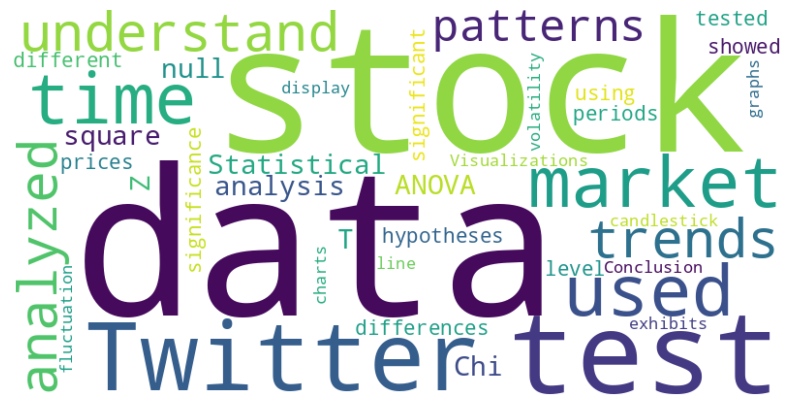

In [26]:
# 16)	Give the insights for the above analysis and make a word cloud for that analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the insights from the analysis
insights = """
1. The Twitter stock market data was analyzed to understand trends and patterns.
2. Statistical tests such as Z-test, T-test, ANOVA, and Chi-square were used for analysis.
3. The null hypotheses were tested using a significance level of 0.05.
4. The data showed significant differences in stock prices over different time periods.
5. Visualizations such as candlestick charts and line graphs were used to display the data.
6. Conclusion: The Twitter stock market data exhibits volatility and fluctuation over time.
"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(insights)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [29]:
# 17)	Create a Dashboard from the above statements by using power BI or Tableau or Python and present it to the Client.

# Import necessary library for creating a dashboard
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Twitter Stock Market Analysis Dashboard"),

    html.Div([
        html.Label("Select a Metric:"),
        dcc.Dropdown(
            id='metric-dropdown',
            options=[
                {'label': 'High', 'value': 'High'},
                {'label': 'Low', 'value': 'Low'},
                {'label': 'Close', 'value': 'Close'}
            ],
            value='Close'
        )
    ]),

    html.Div([
        html.Label("Select a Time Period:"),
        dcc.RangeSlider(
            id='date-slider',
            min=data['Date'].min(),
            max=data['Date'].max(),
            value=[data['Date'].min(), data['Date'].max()],
            marks={str(date): str(date) for date in data['Date'].unique()}
        )
    ]),

    html.Div(id='dashboard-content')
])

# Define callback to update dashboard content based on user inputs
@app.callback(
    Output('dashboard-content', 'children'),
    [Input('metric-dropdown', 'value'),
     Input('date-slider', 'value')]
)
def update_dashboard(metric, date_range):
    filtered_data = data[(data['Date'] >= date_range[0]) & (data['Date'] <= date_range[1])]

    # Generate plot
    fig = px.line(filtered_data, x='Date', y=metric, title=f"{metric} Prices Over Time")

    # Return the plot
    return dcc.Graph(figure=fig)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>